In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn import metrics

In [ ]:
#Load the dataset
df=pd.read_csv("Natural Gas Futures Historical Data.csv",header=0)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 10, 2020",2.202,2.166,2.234,2.137,282.65K,1.66%
1,"Jan 09, 2020",2.166,2.151,2.170,2.105,230.03K,1.17%
2,"Jan 08, 2020",2.141,2.153,2.185,2.115,242.56K,-0.97%
3,"Jan 07, 2020",2.162,2.149,2.178,2.102,163.01K,1.26%
4,"Jan 06, 2020",2.135,2.112,2.173,2.099,154.68K,0.23%
...,...,...,...,...,...,...,...
4995,"Jun 05, 2000",4.398,4.080,4.410,4.050,30.98K,8.78%
4996,"Jun 02, 2000",4.043,4.070,4.160,3.930,40.20K,-0.52%
4997,"Jun 01, 2000",4.064,4.349,4.370,3.800,72.33K,-6.70%
4998,"May 31, 2000",4.356,4.379,4.555,4.345,50.31K,0.05%


In [ ]:
#Number of rows and columns in the dataset
df.shape

(5000, 7)

In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      5000 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [ ]:
#Converting string datatype into datetime datatype
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#Removing 'K' from Vol.
df['Vol.']=df['Vol.'].str[:-1]

#Replacing '' values with '0'
df['Vol.'] = df['Vol.'].replace([''],'0')

#Converting string datatype into float datatype
df['Vol.']=df['Vol.'].astype('float')

In [ ]:
#Removing '%' from Change %
df['Change %']=df['Change %'].str[:-1]

#Converting string datatype into float datatype
df['Change %']=df['Change %'].astype('float')

In [ ]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5000 non-null   datetime64[ns]
 1   Price     5000 non-null   float64       
 2   Open      5000 non-null   float64       
 3   High      5000 non-null   float64       
 4   Low       5000 non-null   float64       
 5   Vol.      5000 non-null   float64       
 6   Change %  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.6 KB


In [ ]:
#Check for missing/null values
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

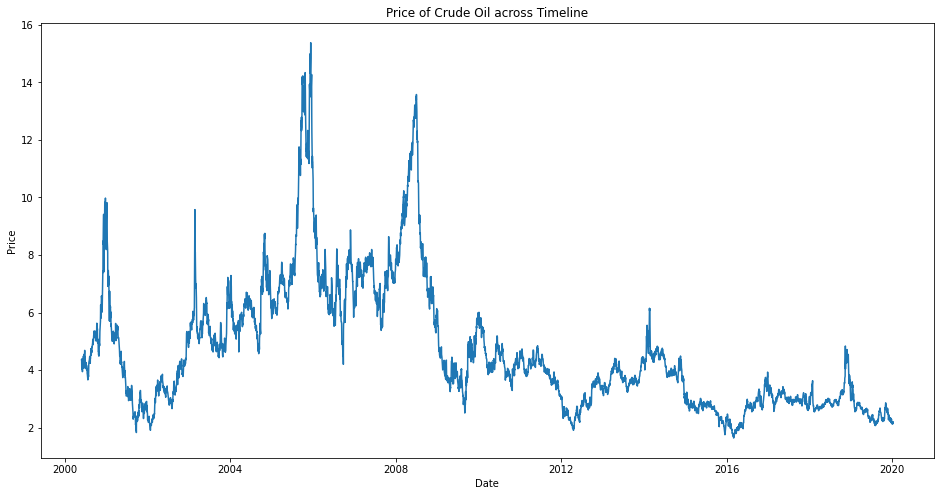

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Price of Crude Oil across Timeline')
plt.plot(df.Date,df.Price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

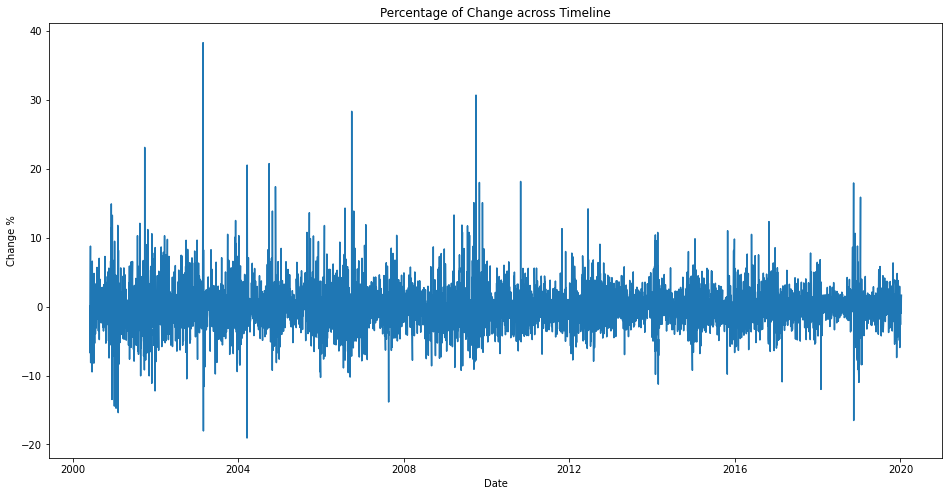

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Percentage of Change across Timeline')
plt.plot(df['Date'],df['Change %'])
plt.xlabel('Date')
plt.ylabel('Change %')
plt.show()

In [ ]:
#Setting Date to be the index of dataframe
df=df.set_index(['Date'])

In [ ]:
d=df.drop(['Open','High','Low','Vol.','Change %'],axis=1)
testdata=d.iloc[:30,:]
traindata=d.iloc[30:,:]

In [ ]:
traindata

,Price
Date,
2019-11-29,2.281
2019-11-28,2.463
2019-11-27,2.501
2019-11-26,2.470
2019-11-25,2.531
...,...
2000-06-05,4.398
2000-06-02,4.043
2000-06-01,4.064


In [ ]:
testdata

,Price
Date,
2020-01-10,2.202
2020-01-09,2.166
2020-01-08,2.141
2020-01-07,2.162
2020-01-06,2.135
2020-01-03,2.130
2020-01-02,2.122
2020-01-01,2.179
2019-12-31,2.189


In [ ]:
def feature_selection(data,label=None):
    data['Date']=data.index
    data['Day of Week']=data['Date'].dt.dayofweek
    data['Month']=data['Date'].dt.month
    data['Year']=data['Date'].dt.year
    data['Day of Year']=data['Date'].dt.dayofyear
    data['Day of Month']=data['Date'].dt.day
    X=data[['Day of Week','Month','Year','Day of Year','Day of Month']]
    if label:
        Y=data[label]
        return X,Y
    return X

In [ ]:
%%capture
X_train,Y_train=feature_selection(traindata,label='Price')
X_test,Y_test=feature_selection(testdata,label='Price')

In [ ]:
print(X_train.shape,X_test.shape)

(4970, 5) (30, 5)


In [ ]:
model=XGBRegressor(n_estimators=1000)

In [ ]:
model.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],verbose=False)

[06:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

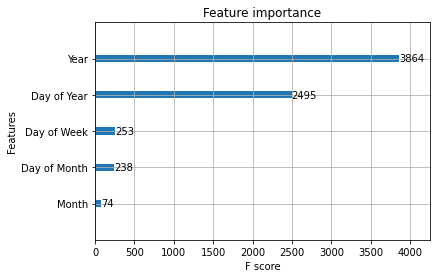

In [ ]:
#Plotting feature importance
plot_importance(model)
plt.rcParams["figure.figsize"]=(8,8)
plt.show()

In [ ]:
%%capture
testdata['Predicted_Price']=model.predict(X_test)
new_data=pd.concat([testdata,traindata])

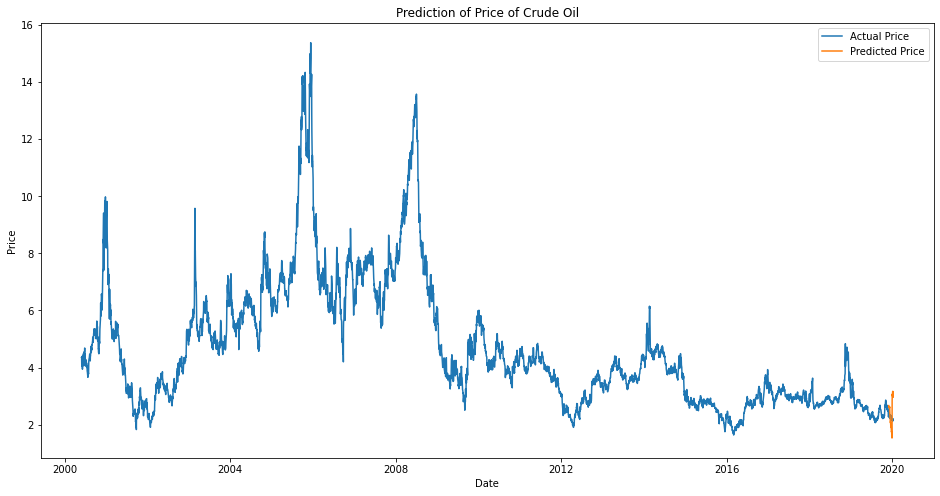

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Prediction of Price of Crude Oil')
plt.plot(new_data.Price)
plt.plot(new_data.Predicted_Price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Actual Price','Predicted Price'])
plt.show()
